## Iris DataSet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('husl')

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# EDA


In [4]:
print('Rows:',df.shape[0])
print('Columns:',df.shape[1])
print()

print('Features')
print()
print( df.columns.tolist())
print()

print(' Unique Values')
print()
print( df.nunique())

Rows: 150
Columns: 5

Features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

 Unique Values

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64


In [5]:
df.species.unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df_setosa = df.loc[df['species']=='setosa']
df_virginica = df.loc[df['species'] == 'virginica']
df_versicolor = df.loc[df['species'] == 'versicolor']

(<Axes: xlabel='species', ylabel='Count'>,
 setosa        50
 versicolor    50
 virginica     50
 Name: species, dtype: int64)

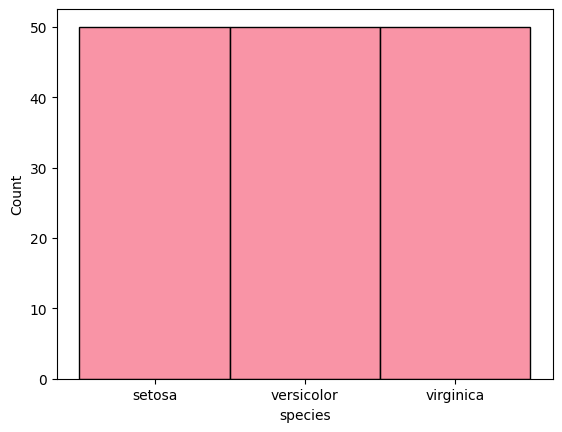

In [8]:
sns.histplot(x='species',data=df), df['species'].value_counts()

## Bivariate Analysis

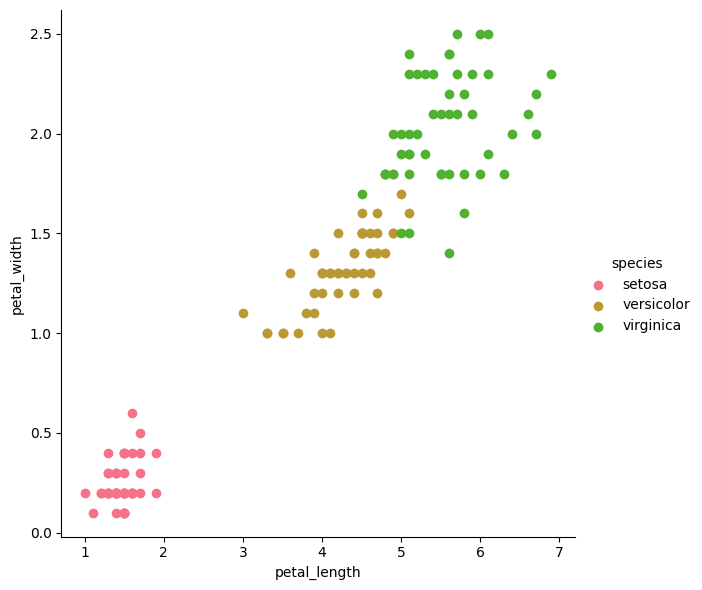

In [10]:
sns.FacetGrid(hue='species', data=df, height=6).map(plt.scatter, 'petal_length', 'petal_width').add_legend()
plt.show()

# **Pembuatan Model**

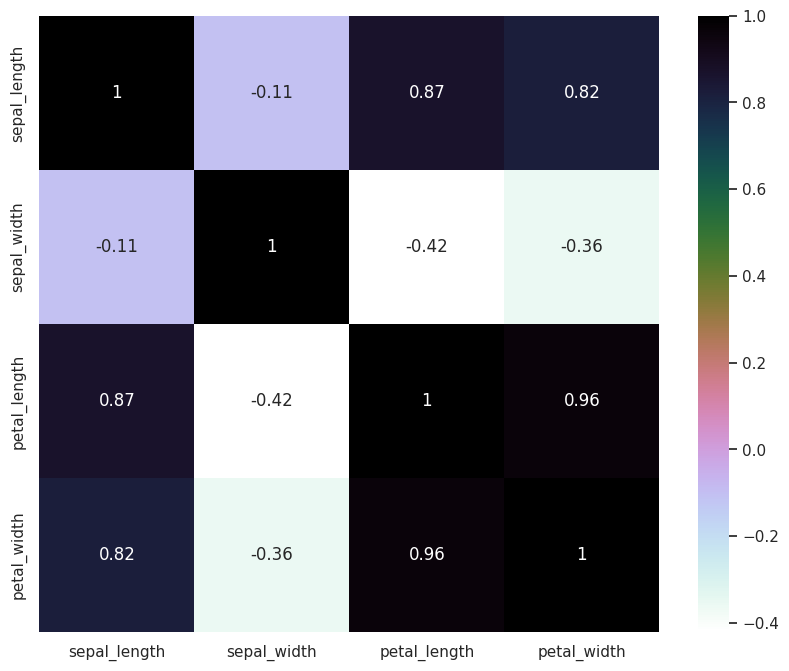

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')
plt.show()

- Sepal_width is not correlating with any of the Features, whereas Petal_length and Petal_width is highly correlating with all of the features

### Performing Test,Train Split

In [14]:
X=df.drop(labels='species', axis=1)
y=df.species

X.shape, y.shape

((150, 4), (150,))

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

### Makikng a PipeLine for Standard Scaler

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline=Pipeline({
    ("scaler", StandardScaler())
})

X_train=pipeline.fit_transform(X_train)


### Model Training

In [17]:
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=0.25)
model_svm.fit(X_train, y_train)

SVC(C=0.25, kernel='linear')

### Checking the Accuracy

In [18]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_svm,X_train,y_train,cv=10)
print(cv_scores)
print()
print("Accuracy of Your Model is :- \n ",cv_scores.mean())

[0.91666667 1.         1.         1.         0.83333333 0.83333333
 1.         1.         1.         0.91666667]

Accuracy of Your Model is :- 
  0.95
